# Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [2]:
df=pd.read_csv(r"datasets\StudentsPerformance.csv")

In [3]:
#we'll see the first five lines
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#we'll see the last five lines
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
#random data
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
690,female,group C,associate's degree,standard,none,49,53,53
215,male,group B,some high school,standard,completed,84,83,75
892,female,group A,master's degree,free/reduced,none,50,67,73
372,male,group D,some high school,standard,none,74,74,72
40,male,group C,associate's degree,free/reduced,none,55,61,54


# Exploratory Data Analysis

In [6]:
df.shape

(1000, 8)

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

##### Missing values

In [10]:
# count null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

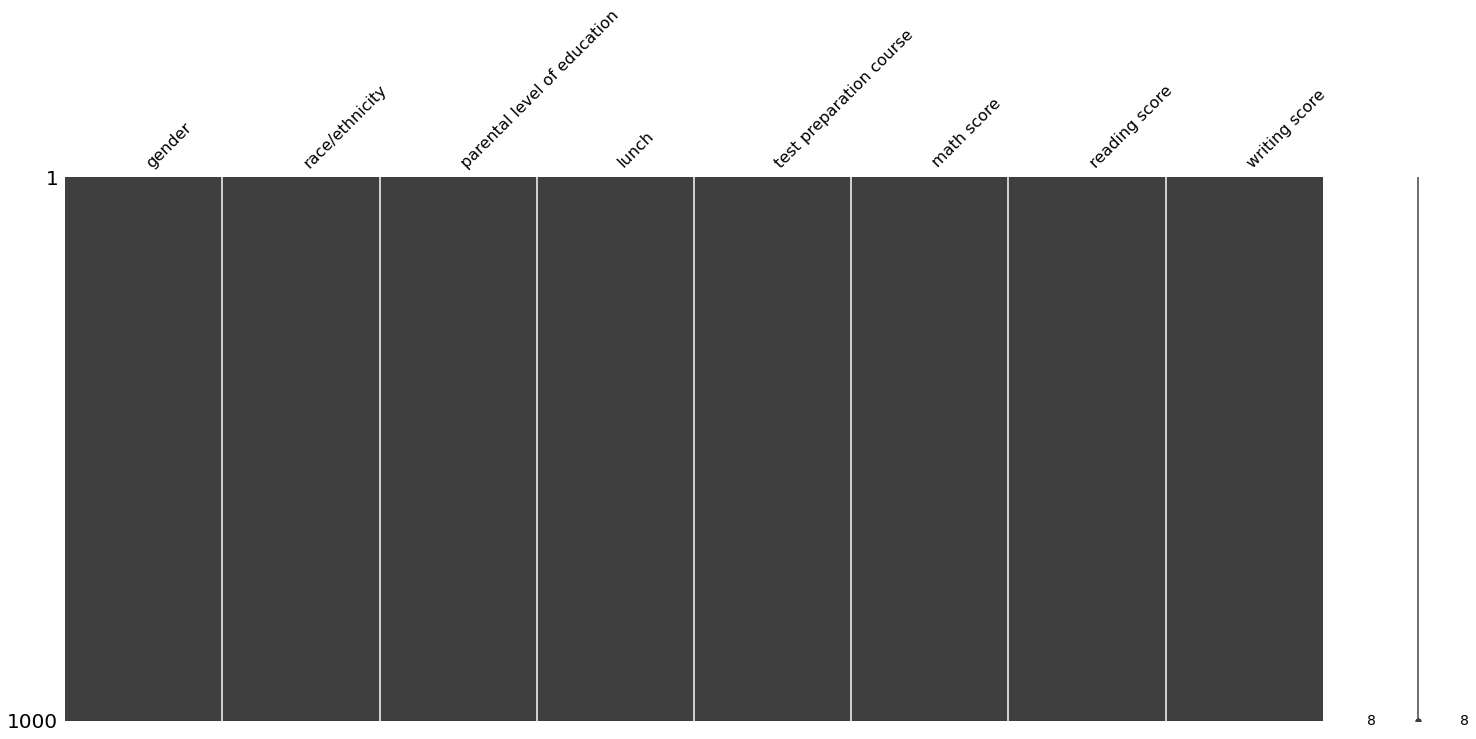

In [11]:
msn.matrix(df)
plt.show()

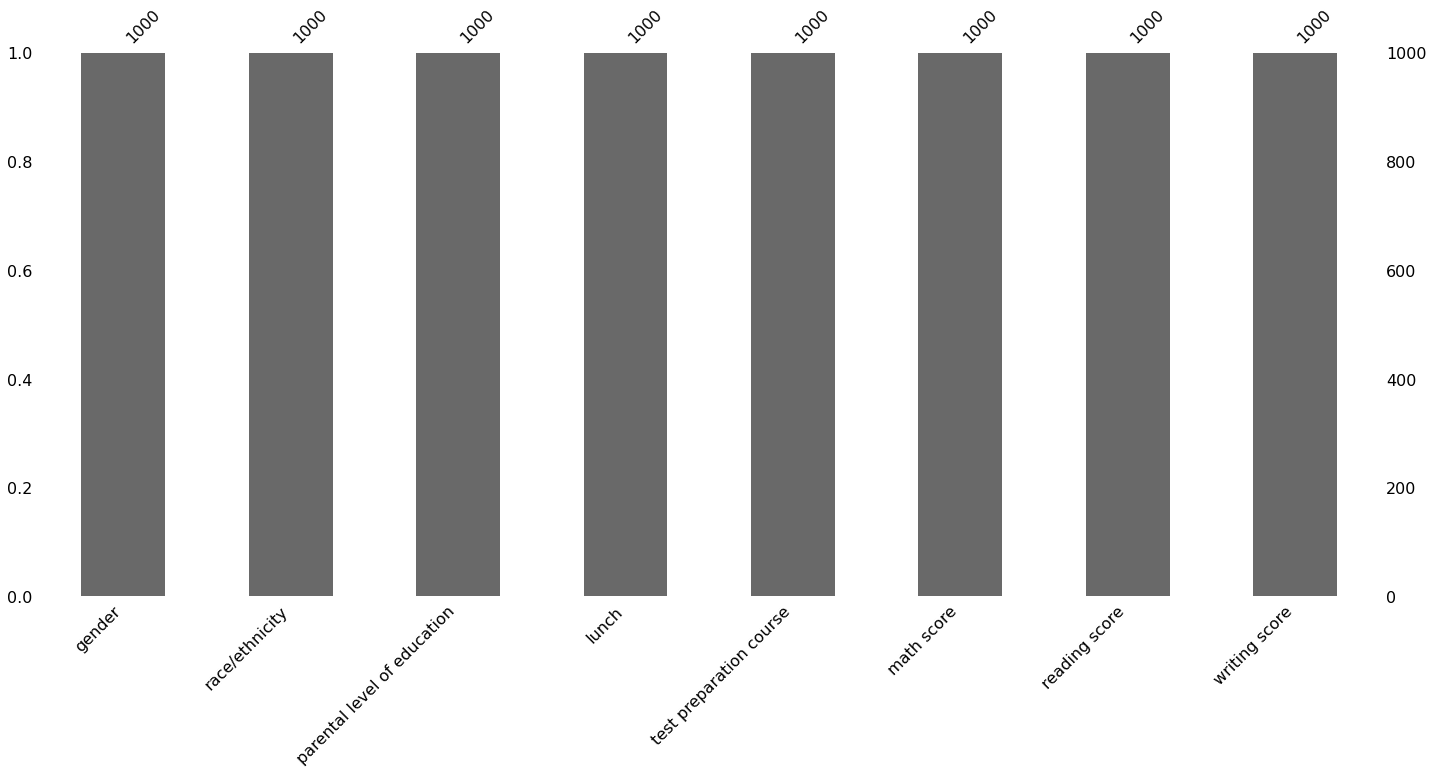

In [12]:
msn.bar(df)
plt.show()

In [13]:
#shows the analysis of numerical values.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [14]:
#shows the analysis of categorical values.
df.describe(include=['object']).T

,count,unique,top,freq
gender,1000,2,female,518
race/ethnicity,1000,5,group C,319
parental level of education,1000,6,some college,226
lunch,1000,2,standard,645
test preparation course,1000,2,none,642


In [15]:
df.rename(columns=({'gender':'Gender','race/ethnicity':'Race/Ethnicity'
                     ,'parental level of education':'Parental_Level_of_Education'
                     ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [16]:
df.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
df['Percentage'] = (df['Math_Score']+df['Reading_Score']+df['Writing_Score'])/3

In [18]:
df.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


##### Grading System

>= 95-> Outstanding                                
>= 81-> Very Good           
>= 71-> Good                           
>= 61-> Average                          
>= 51-> Sufficient                                     
>= 41-> Passable                             
< 41->  Fail                          

In [19]:
def Grade(Percentage):
    if Percentage >= 95:
        return 'O'
    
    if Percentage >= 81:
        return 'A'
    
    if Percentage >= 71:
        return 'B'
    
    if Percentage >= 61:
        return 'C'
    
    if Percentage >= 51:
        return 'D'
    
    if Percentage >= 41:
        return 'E'
    
    return 'F'

In [20]:
df["Grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [21]:
df.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


In [22]:
df.columns

Index(['Gender', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch',
       'Test_Preparation_Course', 'Math_Score', 'Reading_Score',
       'Writing_Score', 'Percentage', 'Grade'],
      dtype='object')

In [23]:
num_cols=df._get_numeric_data().columns
print(num_cols)

Index(['Math_Score', 'Reading_Score', 'Writing_Score', 'Percentage'], dtype='object')


In [24]:
cat_cols=list(set(df.columns)-set(num_cols))
print(cat_cols)

['Grade', 'Gender', 'Test_Preparation_Course', 'Race/Ethnicity', 'Parental_Level_of_Education', 'Lunch']


In [25]:
df.Gender.unique()

array(['female', 'male'], dtype=object)

In [26]:
df['Gender'].value_counts()

female    518
male      482
Name: Gender, dtype: int64

##### Correlation analysis

In [27]:
df.corr()

,Math_Score,Reading_Score,Writing_Score,Percentage
Math_Score,1.000000,0.817580,0.802642,0.918746
Reading_Score,0.817580,1.000000,0.954598,0.970331
Writing_Score,0.802642,0.954598,1.000000,0.965667
Percentage,0.918746,0.970331,0.965667,1.000000


In [28]:
corr=df.corr()

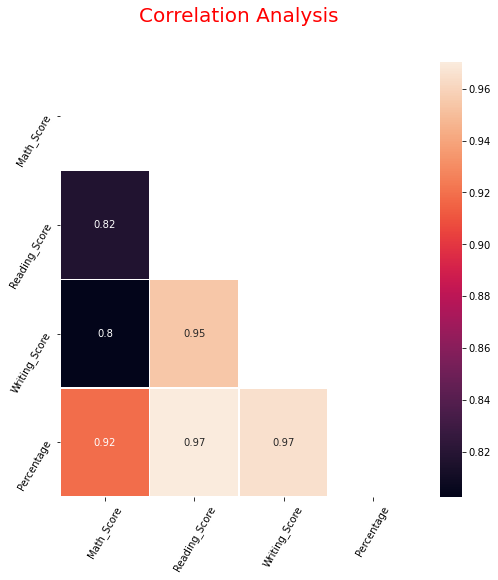

In [29]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(df.corr(), mask=mask, annot=True, linewidths=.5);
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

##### Pie plot

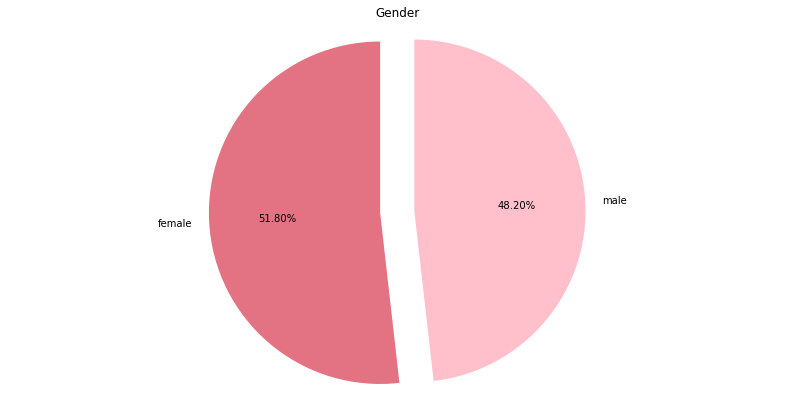

In [30]:
plt.figure(figsize=(14, 7))
labels=df['Gender'].value_counts().index
size=df['Gender'].value_counts().values
plt.pie(size, labels=labels,explode=[0.1,0.1], autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

##### Bar plot

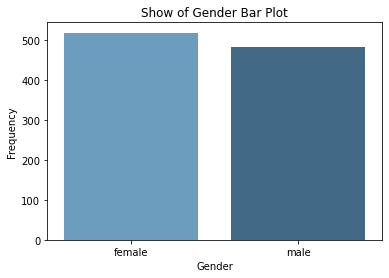

In [31]:
sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts().values, palette="Blues_d")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Show of Gender Bar Plot')
plt.show()

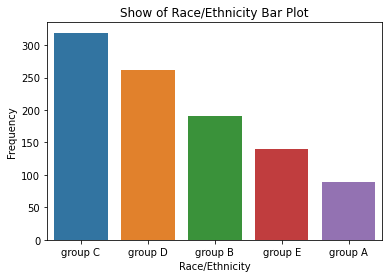

In [32]:
sns.barplot(x=df['Race/Ethnicity'].value_counts().index, y=df['Race/Ethnicity'].value_counts().values)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Show of Race/Ethnicity Bar Plot')
plt.show()

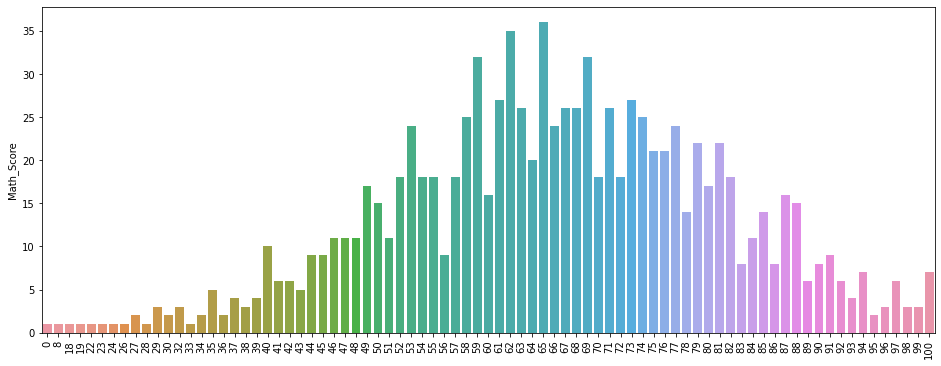

In [33]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Math_Score'].value_counts().index, y=df['Math_Score'].value_counts())
plt.xticks(rotation=90)
plt.show()

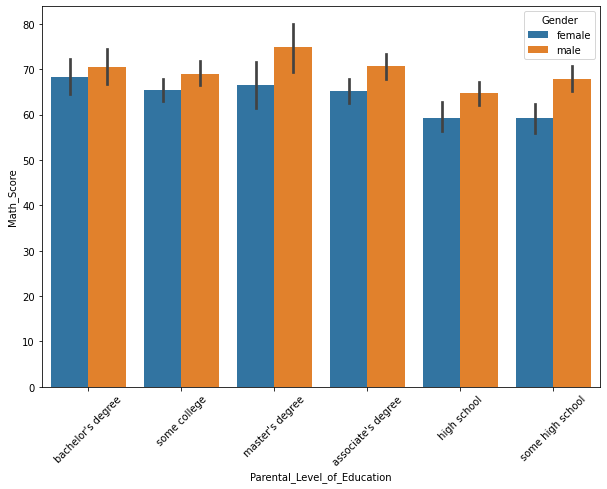

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(x = "Parental_Level_of_Education", y = "Math_Score", hue = "Gender", data = df)
plt.xticks(rotation=45)
plt.show()

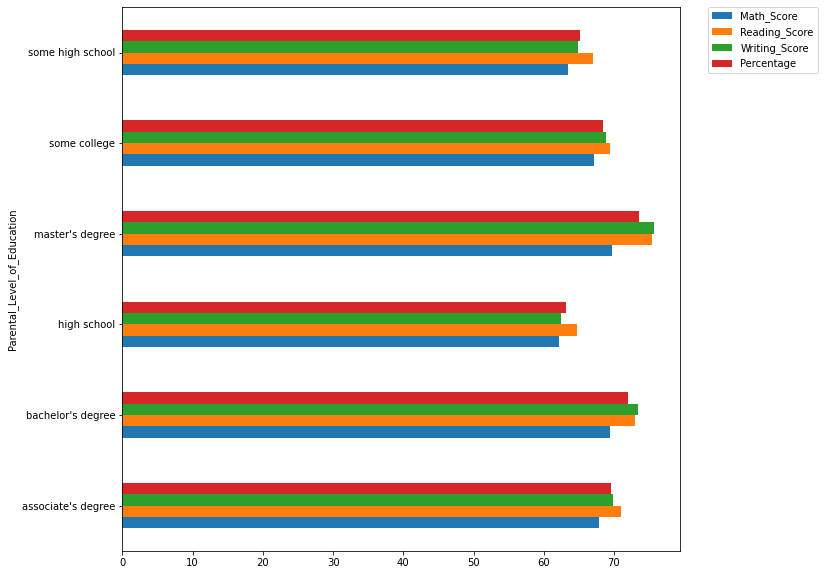

In [35]:
df.groupby('Parental_Level_of_Education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [36]:
df.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


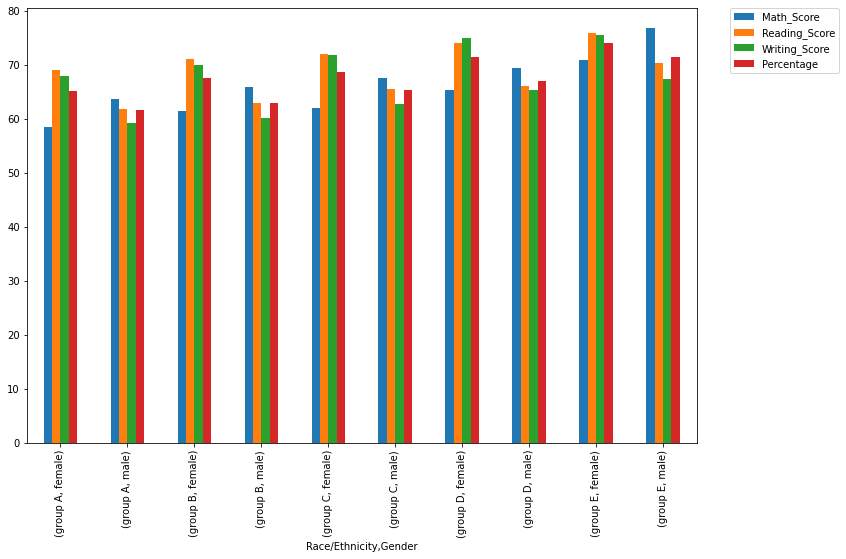

In [37]:
df.groupby(['Race/Ethnicity','Gender']).agg('mean').plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [38]:
df.head()

,Gender,Race/Ethnicity,Parental_Level_of_Education,Lunch,Test_Preparation_Course,Math_Score,Reading_Score,Writing_Score,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


##### Count plot

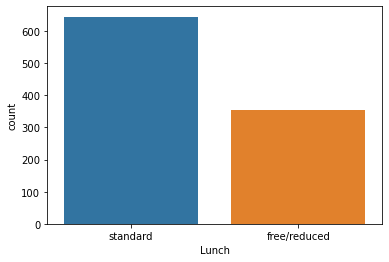

In [39]:
sns.countplot(x= 'Lunch', data= df);
plt.show()

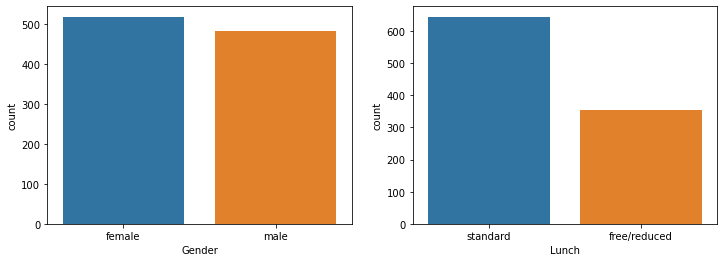

In [40]:
_, axes = plt.subplots(nrows=1, ncols=2,
                      figsize=(12,4))
sns.countplot(x= 'Gender', data= df, ax= axes[0])
sns.countplot(x= 'Lunch', data= df, ax= axes[1]);

In [41]:
df['Parental_Level_of_Education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_of_Education, dtype: int64

In [42]:
level_education=df['Parental_Level_of_Education'].value_counts()

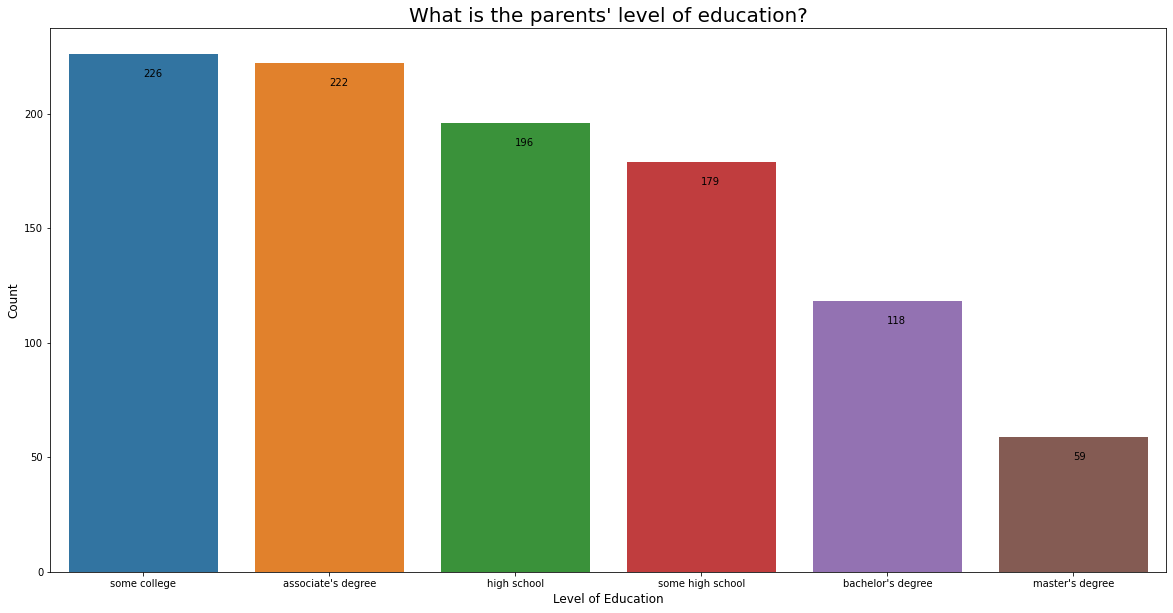

In [43]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=level_education.index, y=level_education.values)
ax.set_title("What is the parents' level of education?", size=20)
ax.set_xlabel(xlabel="Level of Education", size=12)
ax.set_ylabel(ylabel="Count", size=12)

# Annotate value labels to each level
for index, value in enumerate(level_education): 
    plt.annotate(value, xy=(index,value-10), color='black') 

##### Cat plot

<Figure size 720x720 with 0 Axes>

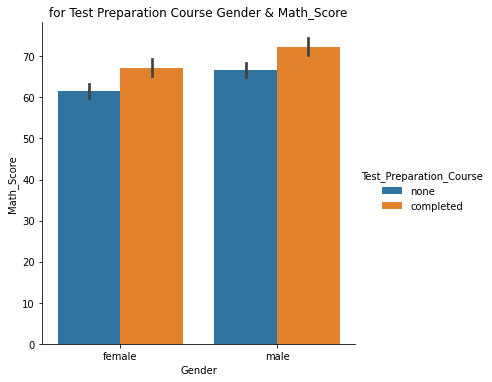

In [44]:
plt.figure(figsize=(10,10))
sns.catplot(x="Gender", y="Math_Score", hue="Test_Preparation_Course", data=df, kind="bar")
plt.title('for Test Preparation Course Gender & Math_Score')
plt.show()

##### Hist plot

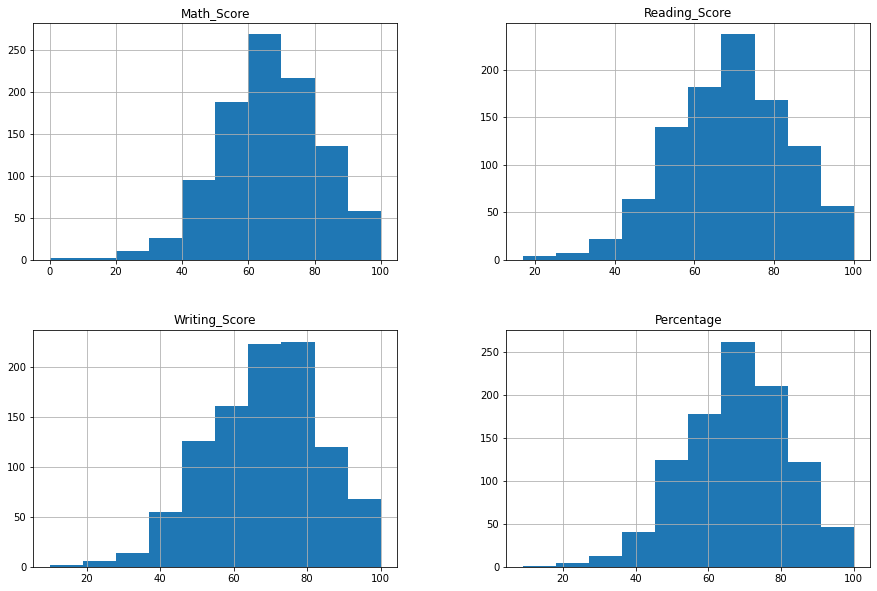

In [45]:
df[num_cols].hist(figsize=(15,10))
plt.show()

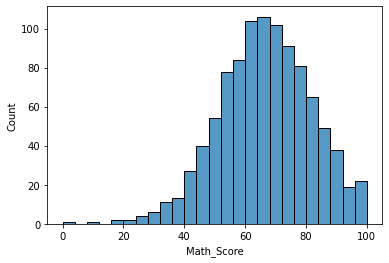

In [46]:
sns.histplot(data=df, x= 'Math_Score')
plt.show()

##### Dist plot

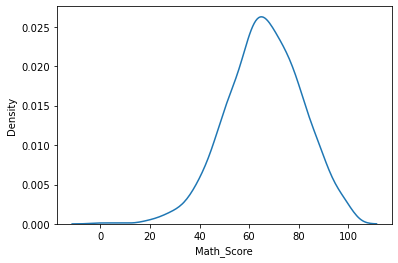

In [47]:
sns.kdeplot(df['Math_Score'])
plt.show()

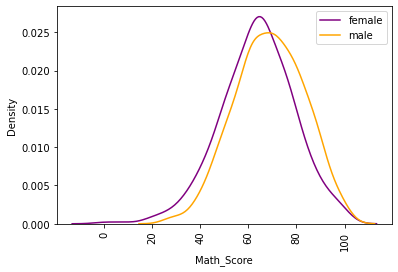

In [48]:
sns.kdeplot(df[df['Gender']=='female']['Math_Score'], color='purple', label='female')
sns.kdeplot(df[df['Gender']=='male']['Math_Score'], color='orange', label='male')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

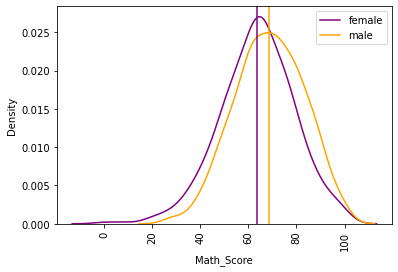

In [49]:
sns.kdeplot(df[df['Gender']=='female']['Math_Score'], color='purple', label='female')
sns.kdeplot(df[df['Gender']=='male']['Math_Score'], color='orange', label='male')

# avg line
plt.axvline(df[df['Gender']=='female']['Math_Score'].mean(), color='purple')
plt.axvline(df[df['Gender']=='male']['Math_Score'].mean(), color='orange')

plt.legend()
plt.xticks(rotation='vertical')
plt.show()

##### Scatter plot

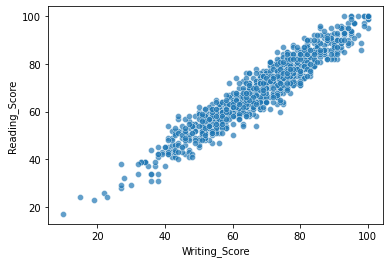

In [50]:
sns.scatterplot(data=df, x='Writing_Score', y='Reading_Score', alpha=0.7)
plt.show()

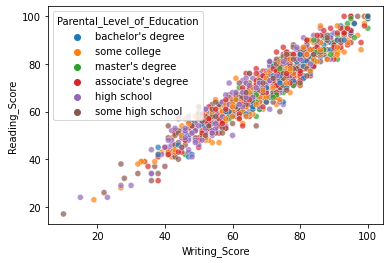

In [51]:
sns.scatterplot(data=df, x='Writing_Score', y='Reading_Score', hue='Parental_Level_of_Education', alpha=0.7)
plt.show()

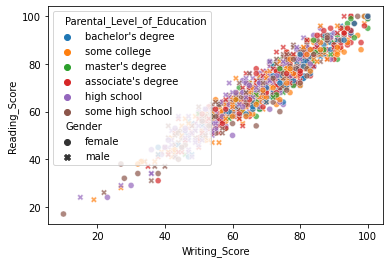

In [52]:
sns.scatterplot(data=df, x='Writing_Score', y='Reading_Score', hue='Parental_Level_of_Education', style='Gender', alpha=0.7)
plt.show()

##### Box plot

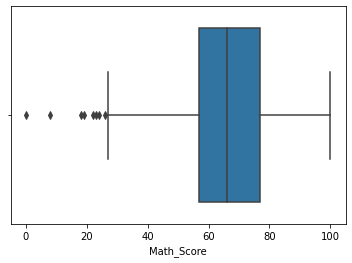

In [53]:
sns.boxplot(df['Math_Score'])
plt.show()

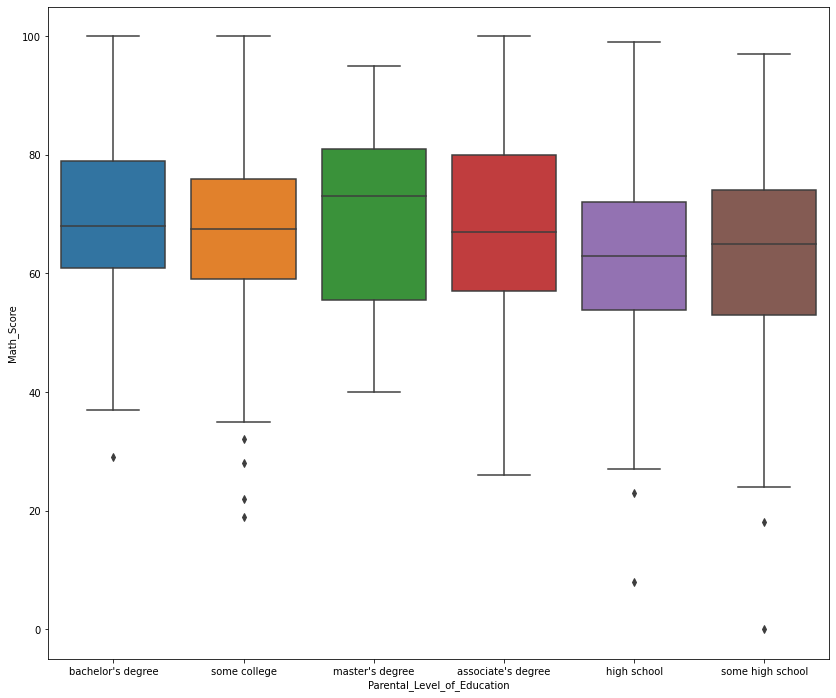

In [54]:
plt.figure(figsize=(14, 12))
sns.boxplot(x='Parental_Level_of_Education', y='Math_Score', data=df)
plt.show()

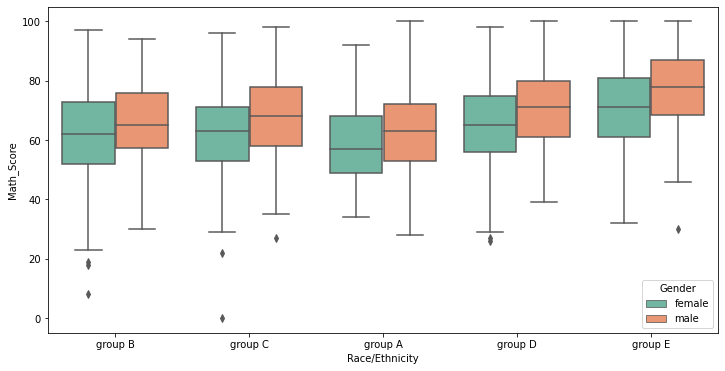

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Race/Ethnicity', y='Math_Score', hue='Gender', palette='Set2', data=df)
plt.show()

##### Violin plot

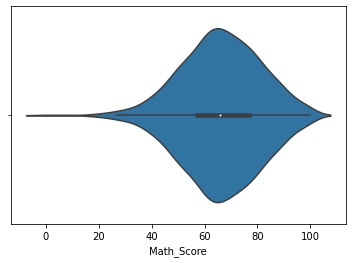

In [56]:
sns.violinplot(df['Math_Score'])
plt.show()

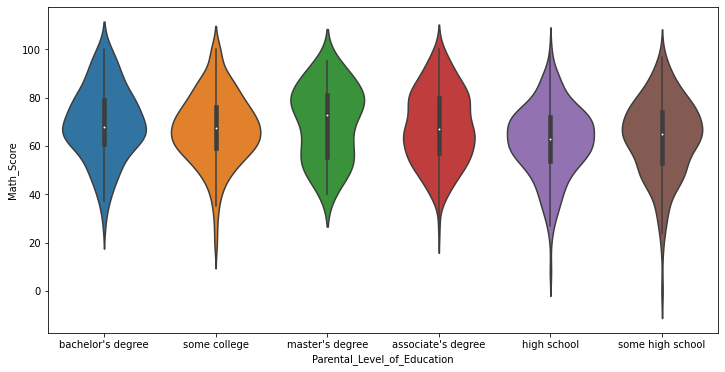

In [57]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Parental_Level_of_Education', y='Math_Score', data=df)
plt.show()

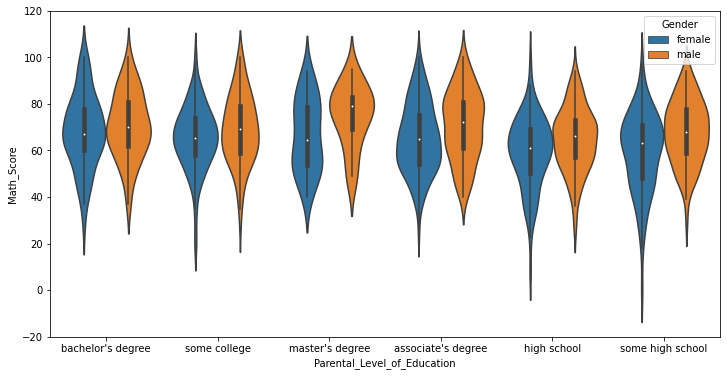

In [58]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Parental_Level_of_Education', y='Math_Score', hue='Gender', data=df)
plt.show()

##### Joint plot

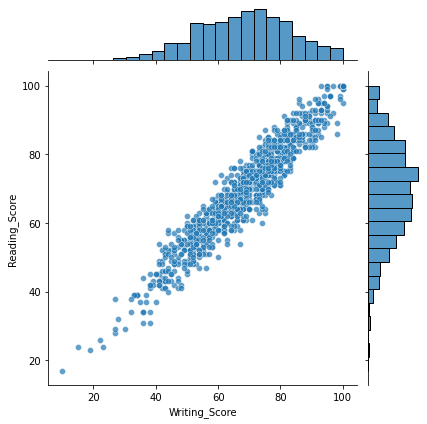

In [59]:
sns.jointplot(data=df, x='Writing_Score', y='Reading_Score', alpha=0.7)
plt.show()

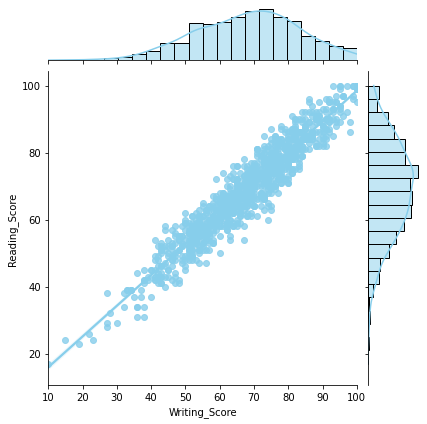

In [60]:
sns.jointplot(data=df, x='Writing_Score', y='Reading_Score', kind='reg', color='skyblue')
plt.show()

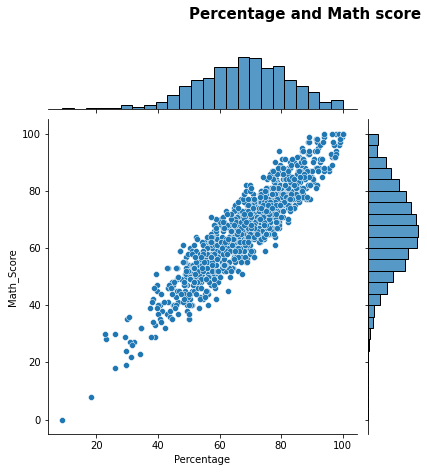

In [61]:
g = sns.JointGrid(data=df, x="Percentage", y="Math_Score")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Math score', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

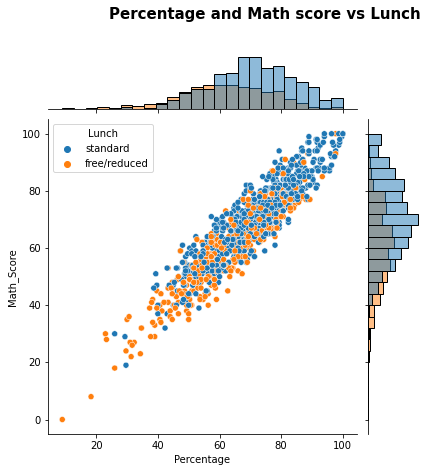

In [62]:
g = sns.JointGrid(data=df, x="Percentage", y="Math_Score", hue='Lunch')
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Math score vs Lunch', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

##### Lm plot

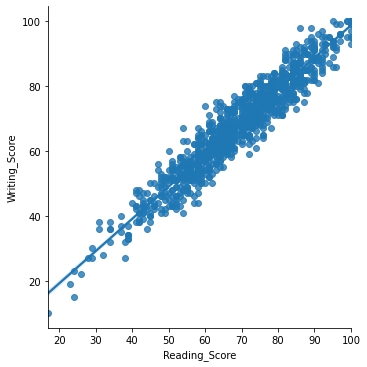

In [63]:
sns.lmplot(x='Reading_Score', y='Writing_Score', data=df, palette='Set1')
plt.show()

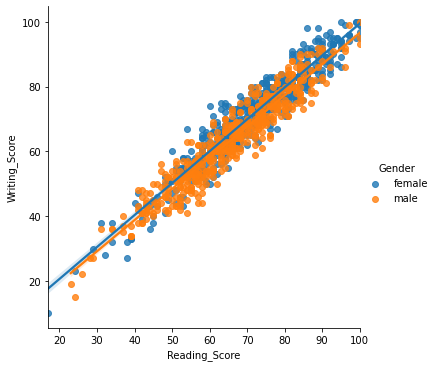

In [64]:
sns.lmplot(x='Reading_Score', y='Writing_Score', hue='Gender', data=df)
plt.show()

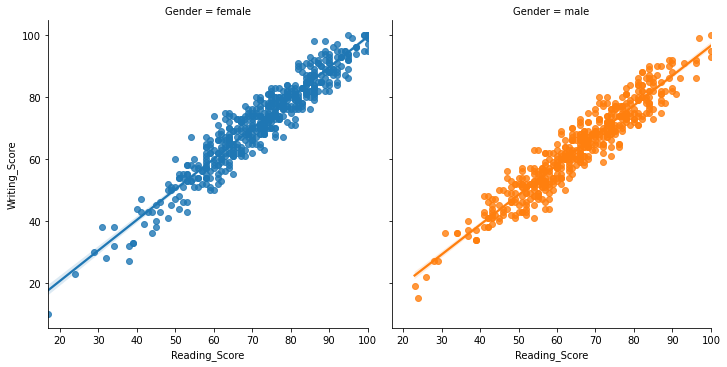

In [65]:
sns.lmplot(x='Reading_Score', y='Writing_Score', hue='Gender', col='Gender', data=df)
plt.show()

##### Pair plot

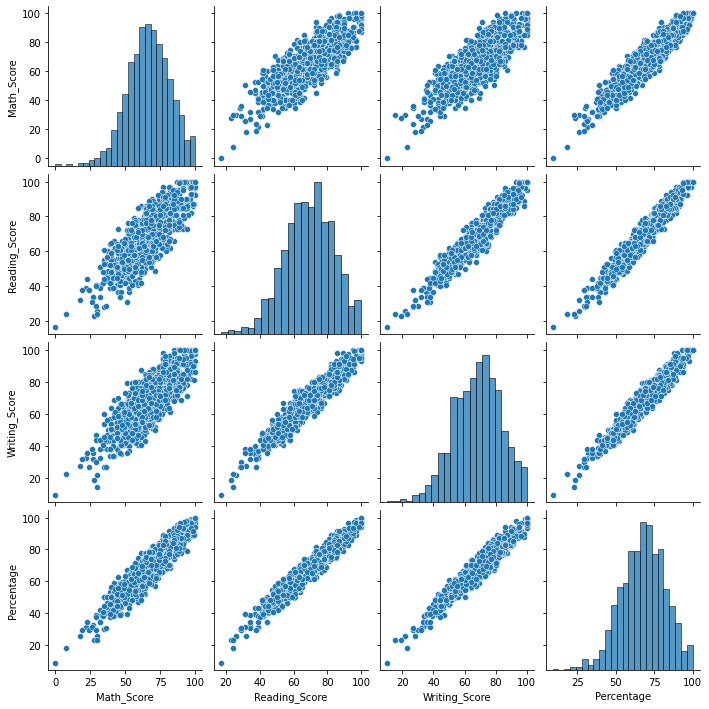

In [66]:
sns.pairplot(df)
plt.show()

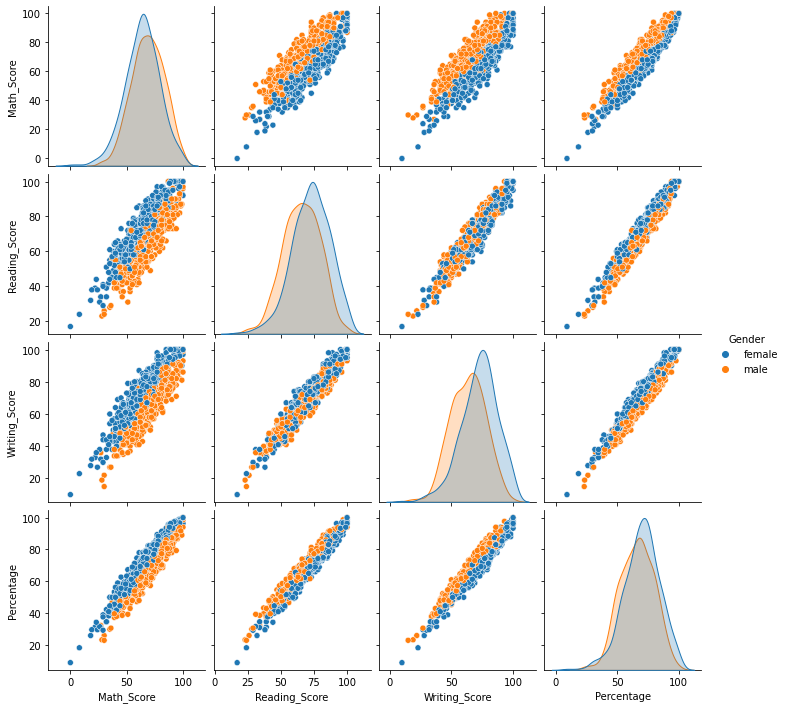

In [67]:
sns.pairplot(df, hue='Gender')
plt.show()